sources:
https://www.kaggle.com/rdoume/beerreviews
https://www.kaggle.com/nickhould/craft-cans?select=beers.csv

good notebooks:
https://www.kaggle.com/fabiancpl/recommending-beers
https://www.kaggle.com/gineychen/beer-reviews
https://www.kaggle.com/ritesaluja/the-beer/data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("beer_reviews.csv")
print("frst few rows of data:")
df.head(5)


frst few rows of data:


,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [12]:
print("information about the columns and data set:\n")
df.info()

information about the columns and data set:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


In [7]:
print("Count of unique breweries, by brewery_id: " ,df.brewery_id.nunique())
print("Count of unique breweries, by brewery_name: " ,df.brewery_name.nunique())
print("Count of unique beers, by beer_id: " ,df.beer_beerid.nunique())
print("Count of unique beers, by beer_name: " ,df.beer_name.nunique())
print("Count of unique users, by review_profilename: " ,df.review_profilename.nunique())

Count of unique breweries, by brewery_id:  5840
Count of unique breweries, by brewery_name:  5742
Count of unique beers, by beer_id:  66055
Count of unique beers, by beer_name:  56857
Count of unique users, by review_profilename:  33387


In [11]:
print("Overview of missing values in the dataset:\n")
df.isnull().sum()

Overview of missing values in the dataset:



brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64

In [13]:
df=df.dropna()
print("After dropping the missing value",df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1518478 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1518478 non-null  int64  
 1   brewery_name        1518478 non-null  object 
 2   review_time         1518478 non-null  int64  
 3   review_overall      1518478 non-null  float64
 4   review_aroma        1518478 non-null  float64
 5   review_appearance   1518478 non-null  float64
 6   review_profilename  1518478 non-null  object 
 7   beer_style          1518478 non-null  object 
 8   review_palate       1518478 non-null  float64
 9   review_taste        1518478 non-null  float64
 10  beer_name           1518478 non-null  object 
 11  beer_abv            1518478 non-null  float64
 12  beer_beerid         1518478 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 162.2+ MB
After dropping the missing value None


In [14]:
print("a user review the same beer more than one time, by beer_name:\n")
df.loc[df.duplicated(['review_profilename', 'beer_name'], keep=False)][['review_profilename', 'beer_beerid', 'beer_name', "review_overall"]]

a user review the same beer more than one time, by beer_name:



,review_profilename,beer_beerid,beer_name,review_overall
187,barleywinefiend,25414,Caldera Pale Ale,4.0
199,barleywinefiend,25414,Caldera Pale Ale,4.0
389,barleywinefiend,10784,Caldera IPA,4.0
426,barleywinefiend,10784,Caldera IPA,3.5
804,flexabull,10785,Ashland Amber,4.0
...,...,...,...,...
1586560,Billolick,35185,India Pale Ale,4.0
1586563,dherling,35185,India Pale Ale,4.0
1586564,cbl2,35185,India Pale Ale,4.0
1586580,EPseja,36388,O'Defiant Stout,5.0


In [38]:
df = df.sort_values("review_overall", ascending = False)
df = df.drop_duplicates(subset = ['review_profilename','beer_beerid'], keep = 'first')
df = df.drop_duplicates(subset = ['review_profilename','beer_name'], keep = 'first')
# minor clean ups
df = df.rename(columns={'beer_beerid': 'beer_id'})
df.review_time = pd.to_datetime (df.review_time,unit = 's')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1496263 entries, 1586613 to 39648
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   brewery_id          1496263 non-null  int64         
 1   brewery_name        1496263 non-null  object        
 2   review_time         1496263 non-null  datetime64[ns]
 3   review_overall      1496263 non-null  float64       
 4   review_aroma        1496263 non-null  float64       
 5   review_appearance   1496263 non-null  float64       
 6   review_profilename  1496263 non-null  object        
 7   beer_style          1496263 non-null  object        
 8   review_palate       1496263 non-null  float64       
 9   review_taste        1496263 non-null  float64       
 10  beer_name           1496263 non-null  object        
 11  beer_abv            1496263 non-null  float64       
 12  beer_id             1496263 non-null  int64         
dtypes: datet

In [19]:
round(df.describe(),2)

,brewery_id,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1496263.00,1496263.00,1496263.00,1496263.00,1496263.00,1496263.00,1496263.00,1496263.00
mean,3068.78,3.83,3.75,3.85,3.75,3.80,7.05,21445.02
std,5541.95,0.72,0.70,0.61,0.68,0.73,2.33,21800.60
min,1.00,0.00,1.00,0.00,1.00,1.00,0.01,5.00
25%,141.00,3.50,3.50,3.50,3.50,3.50,5.20,1655.00
50%,413.00,4.00,4.00,4.00,4.00,4.00,6.50,12962.00
75%,2250.00,4.50,4.00,4.00,4.00,4.50,8.50,39286.00
max,28003.00,5.00,5.00,5.00,5.00,5.00,57.70,77316.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019742DD25E0>,
      dtype=object)

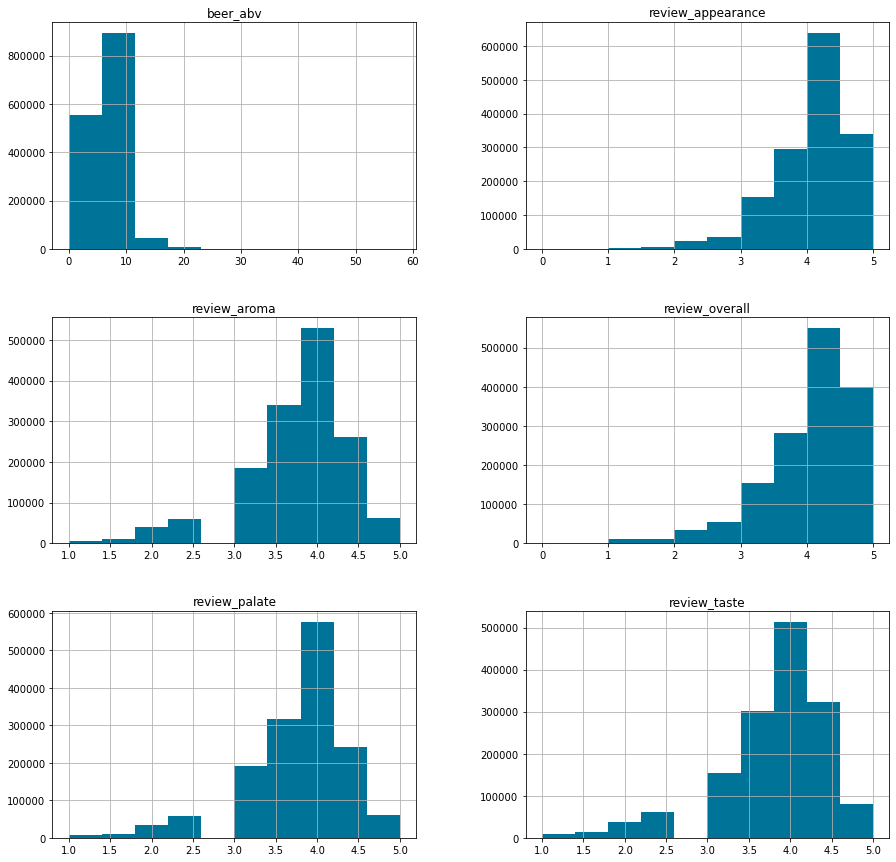

In [36]:
exclude = ['brewery_id', 'beer_id']
df.loc[:, df.columns.difference(exclude)].hist(figsize=(15,15),color='#007399')

# all review columns are average around 4

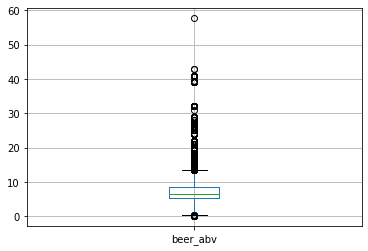

In [52]:
df.boxplot(column = 'beer_abv')

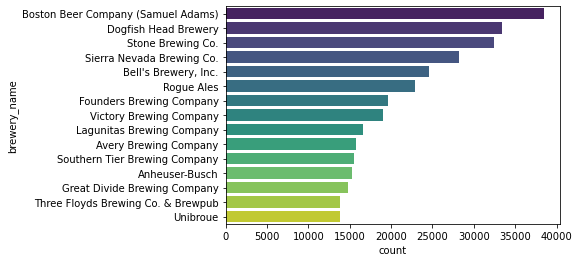

In [66]:
sns.countplot(y="brewery_name", data=df, palette="viridis",
              order=df.brewery_name.value_counts().iloc[:15].index)